# 01. Seaborn - basics

## 01.01 What is Seaborn?

#### According to Matplotlib website: https://seaborn.pydata.org

Seaborn is a Python data visualization library **based on Matplotlib**. It provides a **high-level** interface for drawing attractive and informative statistical graphics.


#### According to [REF1](../README.md) :

Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and **integrates with** the functionality provided by **Pandas DataFrames**.

## 01.02 Quickstart - Let's make your first plot!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# apply seaborn style as default
sns.set()

* first - let's do this with matplotlib-style

In [2]:
x = np.linspace(0, 3*np.pi, 20)
y_sin = np.sin(x)
y_cos = np.cos(x)

In [3]:
df_pandas = pd.DataFrame({'y_sin': y_sin, 'y_cos':y_cos}, index=x)
df_pandas.head()

,y_sin,y_cos
0.000000,0.000000,1.000000
0.496041,0.475947,0.879474
0.992082,0.837166,0.546948
1.488123,0.996584,0.082579
1.984164,0.915773,-0.401695


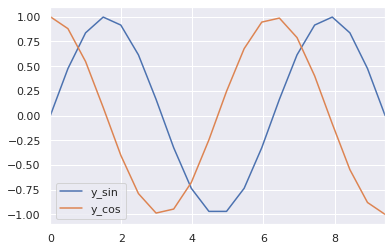

In [4]:
df_pandas.plot()

* now - let's try seaborn-style
the key difference is the way we provide the data. 

In [5]:
df_sns_sin = pd.DataFrame({"x":x, "y": y_sin, "func":"sin"})
df_sns_sin.head()

,x,y,func
0,0.000000,0.000000,sin
1,0.496041,0.475947,sin
2,0.992082,0.837166,sin
3,1.488123,0.996584,sin
4,1.984164,0.915773,sin


In [6]:
df_sns_cos = pd.DataFrame({"x":x, "y": y_cos, "func":"cos"})
df_sns_cos.head()

,x,y,func
0,0.000000,1.000000,cos
1,0.496041,0.879474,cos
2,0.992082,0.546948,cos
3,1.488123,0.082579,cos
4,1.984164,-0.401695,cos


In [7]:
# both of [df_sns_sin, df_sns_cos] index is [0,1,...,18,19]
# we set ignore_index=True to set new indexing
df_sns_all = pd.concat([df_sns_sin, df_sns_cos], ignore_index=True)
display(df_sns_all.head())
display(df_sns_all.tail())

,x,y,func
0,0.000000,0.000000,sin
1,0.496041,0.475947,sin
2,0.992082,0.837166,sin
3,1.488123,0.996584,sin
4,1.984164,0.915773,sin


,x,y,func
35,7.440614,0.401695,cos
36,7.936655,-0.082579,cos
37,8.432696,-0.546948,cos
38,8.928737,-0.879474,cos
39,9.424778,-1.000000,cos


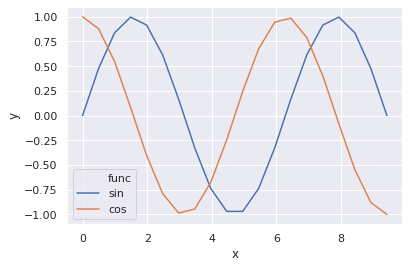

In [8]:
# finally we plot the data with different colors plots
sns.lineplot(data=df_sns_all, x="x", y="y", hue="func")

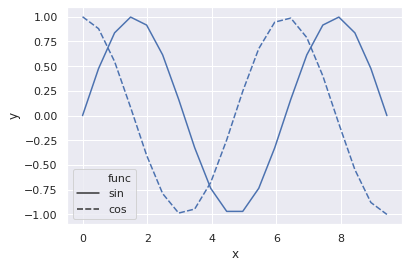

In [9]:
# we can plot the data with different linestyles as well
sns.lineplot(data=df_sns_all, x="x", y="y", style="func")

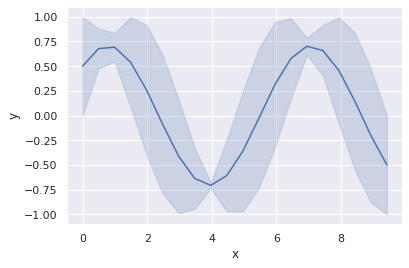

In [10]:
# if we provide more than one value of `y` per `x` seaborn will aproximate values 
sns.lineplot(data=df_sns_all, x="x", y="y")

## 01.03 Explore seaborn!
In the next part of the tutorial we will explore Diamonds dataset
https://www.kaggle.com/shivam2503/diamonds#diamonds.csv


### Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

### Content

**carat** weight of the diamond (0.2--5.01)

**cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color** diamond colour, from J (worst) to D (best)

**clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**depth** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table** width of top of diamond relative to widest point (43--95)

**price** price in US dollars (326-18,823$)

**x** length in mm (0--10.74)

**y** width in mm (0--58.9)

**z** depth in mm (0--31.8)

In [11]:
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

In [12]:
df_diamonds = pd.read_csv("../92_data/diamonds.csv", index_col=0)
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
print(f"Diamonds rows: {len(df_diamonds)}")
print(f"Diamonds cols: {df_diamonds.shape[1]}")
print(f"Missing values: {df_diamonds.isnull().sum().sum()}")

Diamonds rows: 53940
Diamonds cols: 10
Missing values: 0


In [14]:
df_diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [15]:
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


* `swarm` plot is very useful to see distributions when we have categorical columns. Unfortunately it is not the best to visualize large amount of data.

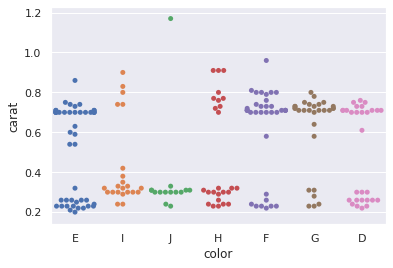

In [16]:
# NOTE: at least one of the axes has to be numerical (not categorical)
sns.swarmplot(x="color", y="carat", data=df_diamonds.head(200));

* TO solve this issue we need to use `box` plot. The idea behind this kind of plot is shown below.

<img src="img/01.png">

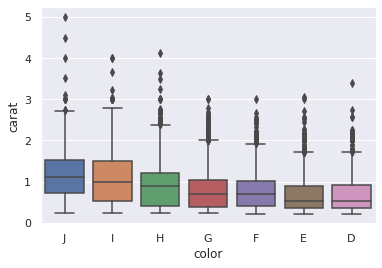

In [17]:
# to keep the desired order!
sns.boxplot(x="color", y="carat", data=df_diamonds, order=color_order);

* How to combine seaborn with matplotlib?

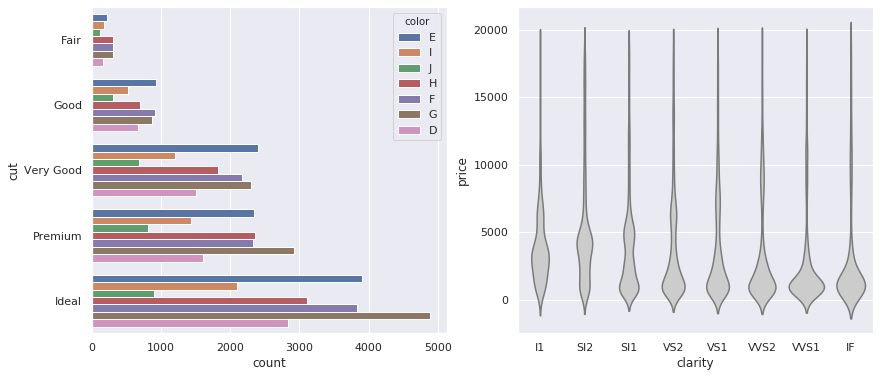

In [18]:
fig, ax = plt.subplots(1,2, figsize=(14,6))

sns.countplot(y='cut', hue='color', data=df_diamonds, ax = ax.flat[0], order=cut_order)
sns.violinplot(x="clarity", 
               y="price", 
               data=df_diamonds, 
               inner=None, 
               color=".8", 
               ax= ax.flat[1], 
               order=clarity_order);

* NOTE violinplot (on the right) side goes below 0 which is caused by approximation. There are no diamond prices below 0! To see real distribution let's draw the histogram and KDE plot.

To note some intuition behind KDE (Kernel Density Estimation) see https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation

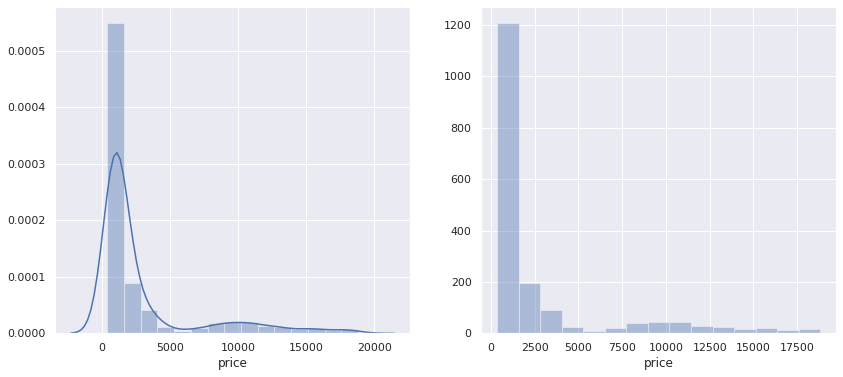

In [19]:
df_diamonds_best_clarity = df_diamonds.query("clarity=='IF'")

fig, ax = plt.subplots(1,2, figsize=(14,6))
sns.distplot(df_diamonds_best_clarity['price'], bins=15, ax=ax.flat[0])
sns.distplot(df_diamonds_best_clarity['price'], bins=15, ax=ax.flat[1], norm_hist=False, kde=False)

## 01.04 Mulitiple plots in  seaborn

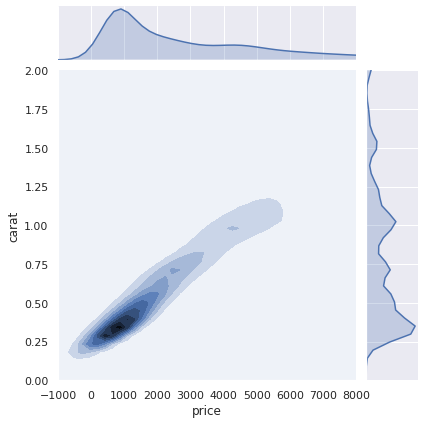

In [20]:
sns.jointplot(x="price", y="carat", data=df_diamonds, kind="kde", xlim=(-1000, 8000), ylim=(0,2))

* honorable mentions  
`sns.catplot`  
`sns.pairplot`  
`sns.PairGrid`  
`sns.heatmap`

**IMPORTANT**
Care what function returns!

sns.relplot `return`   
g: class:`FacetGrid` 

sns.lineplot `return`  
ax: matplotlib `Axes` 